In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparation

In [19]:
train = pd.read_csv('/content/train.csv')

In [20]:
train.columns


Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

<Axes: xlabel='exam score'>

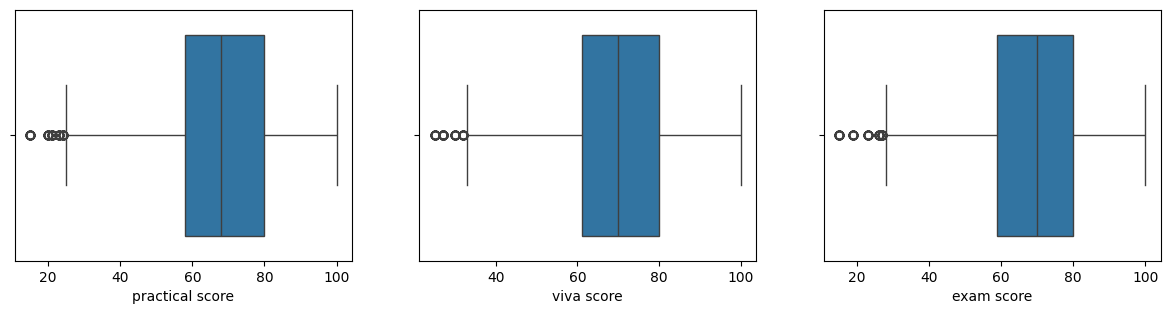

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data = train, x = 'practical score')

plt.subplot(4,4,2)
sns.boxplot(data = train, x = 'viva score')

plt.subplot(4,4,3)
sns.boxplot(data = train, x = 'exam score')

In [22]:
train['practical score']=train['practical score'].clip(lower=train['practical score'].quantile(0.05), upper=train['practical score'].quantile(0.95))
train['viva score']=train['viva score'].clip(lower=train['viva score'].quantile(0.05), upper=train['viva score'].quantile(0.95))
train['exam score']=train['exam score'].clip(lower=train['exam score'].quantile(0.05), upper=train['exam score'].quantile(0.95))

<Axes: xlabel='exam score'>

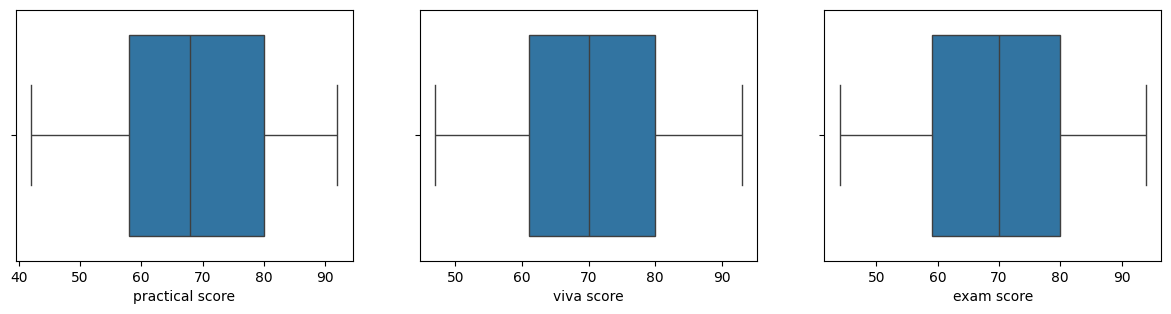

In [23]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data = train, x = 'practical score')

plt.subplot(4,4,2)
sns.boxplot(data = train, x = 'viva score')

plt.subplot(4,4,3)
sns.boxplot(data = train, x = 'exam score')

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
def label_encode(df, column):
    df = df.copy()
    column_label = LabelEncoder()
    df[column] = column_label.fit_transform(df[column])
    return df

In [27]:
def preprocess_inputs(df):
    df = df.copy()
    # Drop Roll no column
    df = df.drop('Roll no', axis=1)
 # One-hot encode categorical features
    for column in ['test preparation ', 'gender', 'parental level of education', 'lunch', 'Section']:
          df = label_encode(df, column)

    X = df.drop('exam score', axis =1)
    y = df['exam score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)



    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


    return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = preprocess_inputs(train)

In [29]:
X_train.head()

,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,0.715909,-0.992129,1.393747,0.707438,-0.167786,-0.210498,-1.794930
1,0.715909,1.007934,-0.292678,-1.413551,0.710306,0.287790,-0.269473
2,-1.396825,1.007934,-0.854820,0.707438,-0.167786,-0.352865,0.569528
3,0.715909,-0.992129,-0.292678,0.707438,1.588398,-1.705359,0.340710
4,0.715909,-0.992129,-0.292678,0.707438,-0.167786,0.786077,-1.794930


In [30]:
X_train.shape


(22399, 7)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
def evaluate_models(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return "\n\nmean_absolute_error: {} \nmean_squared_error: {} \nroot_mean_squared_error: {} \nr2_square: {} " . format(
        mae, mse, rmse, r2)

# Linear Regression

In [33]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_lin_train = linear.predict(X_train)
y_pred_lin_test = linear.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_lin_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_lin_test))

--------------------------------


mean_absolute_error: 11.610224175794421 
mean_squared_error: 194.9287766312154 
root_mean_squared_error: 13.961689605173703 
r2_square: 0.0010259832278762815 
--------------------------------


mean_absolute_error: 11.586102416405906 
mean_squared_error: 193.5416065787439 
root_mean_squared_error: 13.911923180450067 
r2_square: 0.0020252994260375745 


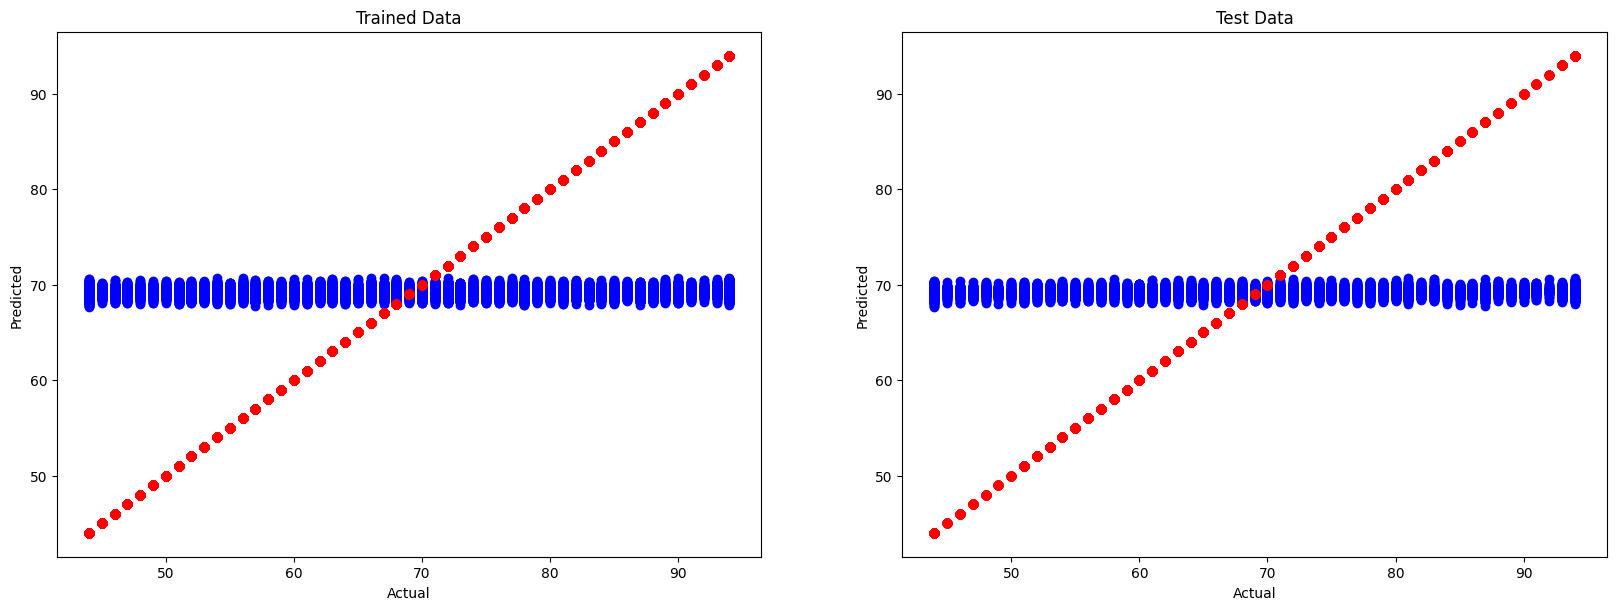

In [34]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_lin_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_lin_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Logistic Regression

In [35]:
logis = LogisticRegression(max_iter=1000)

In [36]:

logis.fit(X_train,y_train)
y_pred_log_train = logis.predict(X_train)
y_pred_log_test = logis.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_log_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_log_test))

--------------------------------


mean_absolute_error: 24.894638153488994 
mean_squared_error: 815.256082860842 
root_mean_squared_error: 28.552689590664517 
r2_square: -3.1780370136637046 
--------------------------------


mean_absolute_error: 25.042083333333334 
mean_squared_error: 821.4910416666667 
root_mean_squared_error: 28.66166501909243 
r2_square: -3.235922656754071 


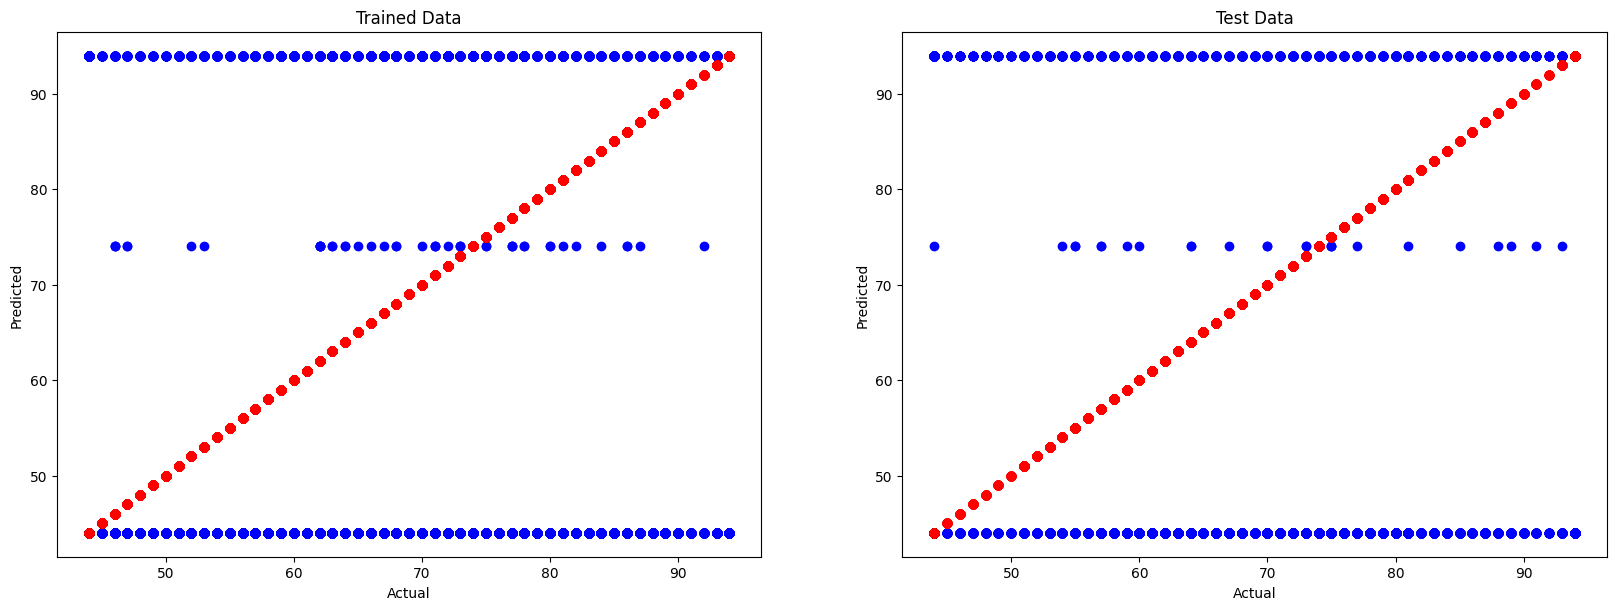

In [37]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_log_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_log_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [38]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth= 5)

In [39]:
dtr.fit(X_train,y_train)
y_pred_dtr_train = dtr.predict(X_train)
y_pred_dtr_test = dtr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_dtr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_dtr_test))

--------------------------------


mean_absolute_error: 11.557170132241984 
mean_squared_error: 193.41519904632455 
root_mean_squared_error: 13.907379301878716 
r2_square: 0.008782789102338207 
--------------------------------


mean_absolute_error: 11.61574923370679 
mean_squared_error: 194.71349761770756 
root_mean_squared_error: 13.953977842096052 
r2_square: -0.004017419911621856 


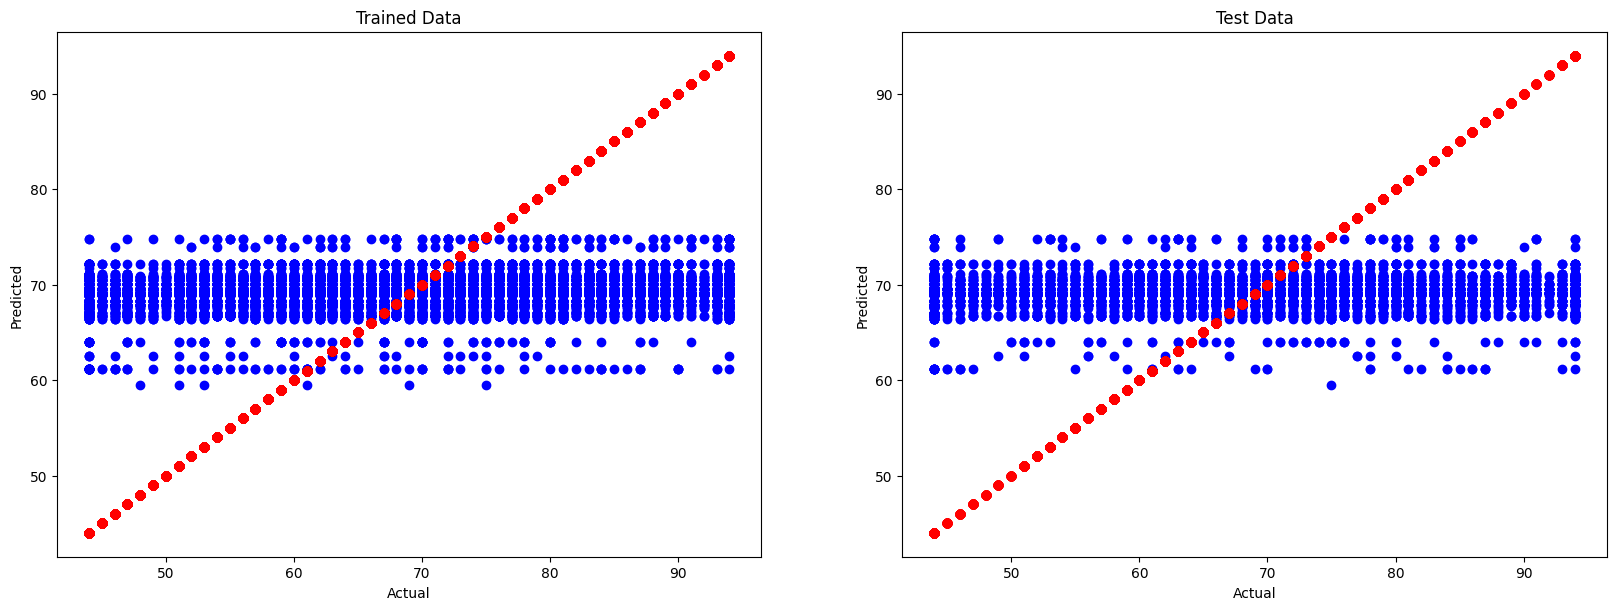

In [40]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_dtr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_dtr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [41]:
rgr = RandomForestRegressor(max_depth = 7, n_estimators = 128)

In [42]:

rgr.fit(X_train,y_train)
y_pred_rgr_train = rgr.predict(X_train)
y_pred_rgr_test = rgr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_rgr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_rgr_test))

--------------------------------


mean_absolute_error: 11.370413315502272 
mean_squared_error: 187.01364793205678 
root_mean_squared_error: 13.67529333989062 
r2_square: 0.04158955750621918 
--------------------------------


mean_absolute_error: 11.577479043743693 
mean_squared_error: 193.20811069325921 
root_mean_squared_error: 13.899932039159731 
r2_square: 0.003744932027742842 


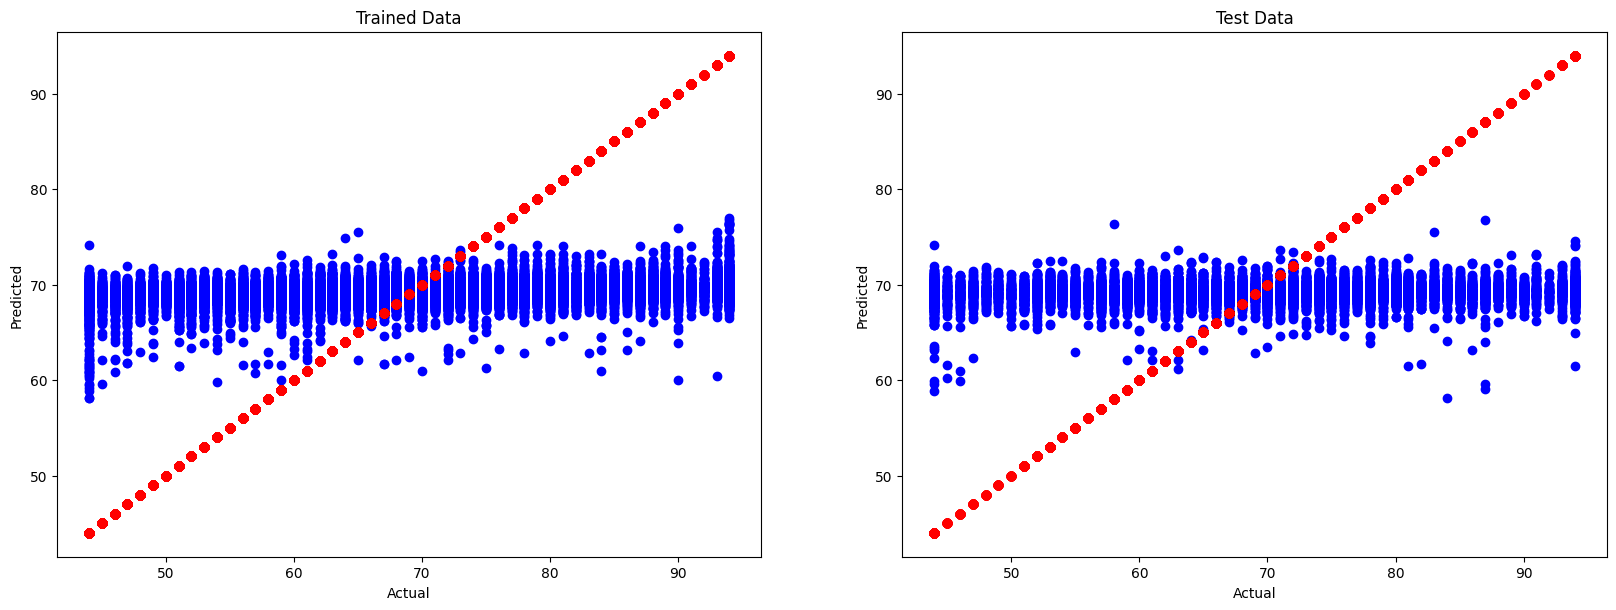

In [43]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_rgr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_rgr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [44]:
gbr = GradientBoostingRegressor()

In [45]:
gbr.fit(X_train,y_train)
y_pred_gbr_train = gbr.predict(X_train)
y_pred_gbr_test = gbr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_gbr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_gbr_test))

--------------------------------


mean_absolute_error: 11.505038615424402 
mean_squared_error: 191.78359404108141 
root_mean_squared_error: 13.848595381520878 
r2_square: 0.0171444637305892 
--------------------------------


mean_absolute_error: 11.598062456387867 
mean_squared_error: 193.88030239843027 
root_mean_squared_error: 13.924090720705259 
r2_square: 0.0002788539706537474 


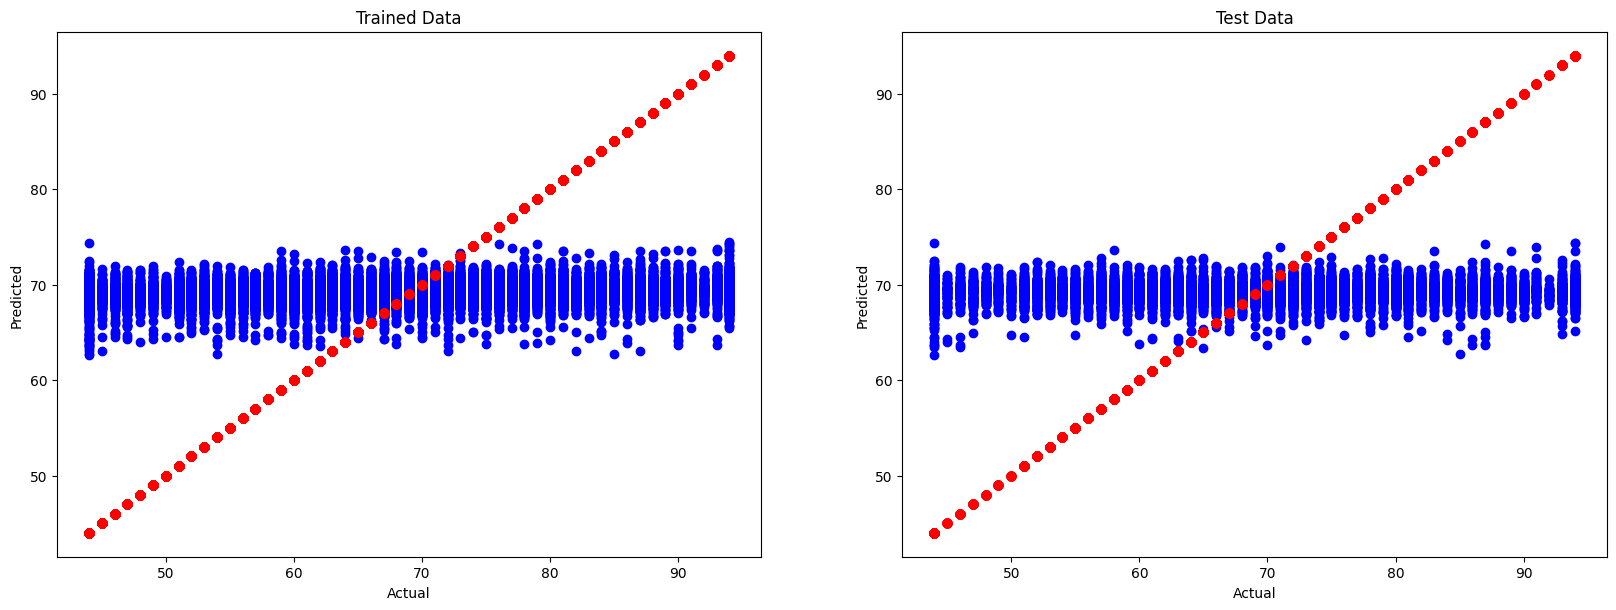

In [46]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_gbr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_gbr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [47]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import warnings

In [48]:
svr = SVR()

In [49]:
svr.fit(X_train,y_train)
y_pred_svr_train = svr.predict(X_train)
y_pred_svr_test = svr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_svr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_svr_test))

--------------------------------


mean_absolute_error: 11.49851444514075 
mean_squared_error: 193.62237525316428 
root_mean_squared_error: 13.914825735637665 
r2_square: 0.007721049265342006 
--------------------------------


mean_absolute_error: 11.586893644696868 
mean_squared_error: 194.93358801699588 
root_mean_squared_error: 13.961861910826789 
r2_square: -0.005152290362537615 


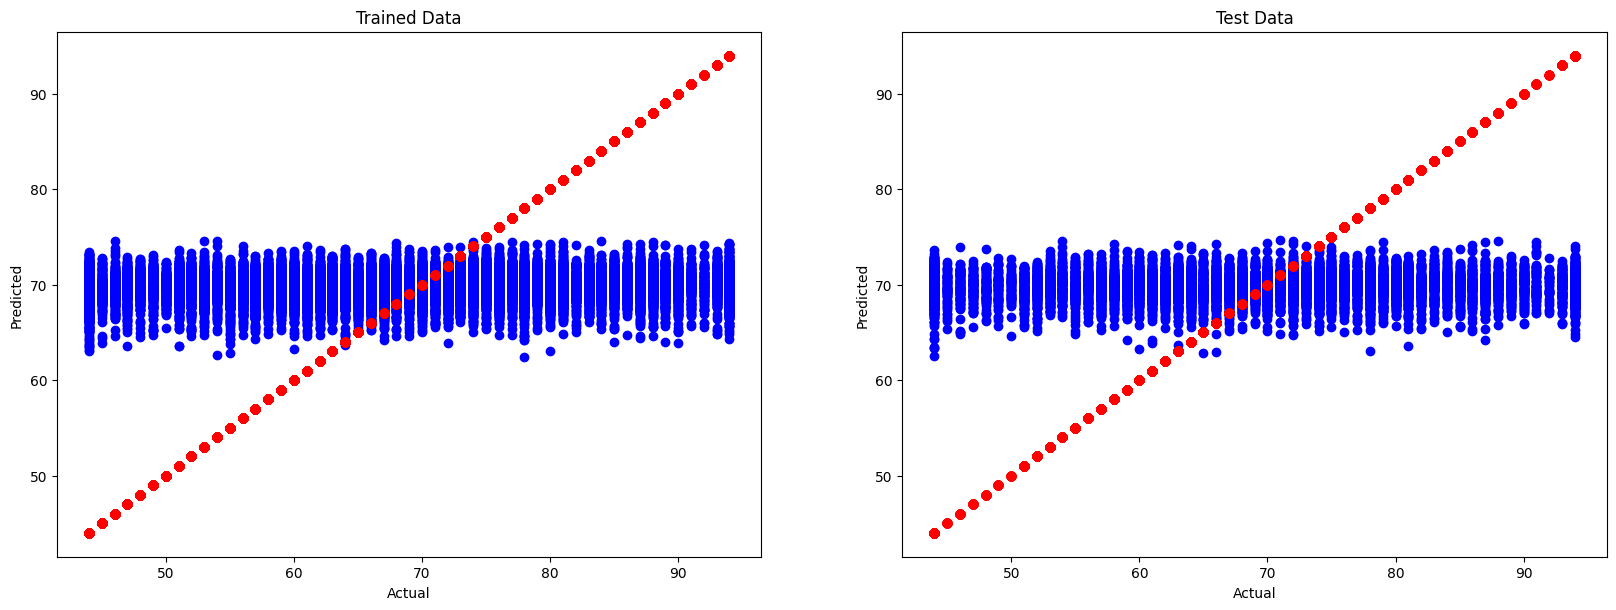

In [50]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_svr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_svr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [51]:
knr = KNeighborsRegressor()

In [52]:
knr.fit(X_train,y_train)
y_pred_knr_train = knr.predict(X_train)
y_pred_knr_test = knr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_knr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_knr_test))

--------------------------------


mean_absolute_error: 10.074083664449306 
mean_squared_error: 151.6867663734988 
root_mean_squared_error: 12.316118153602572 
r2_square: 0.2226333078466416 
--------------------------------


mean_absolute_error: 12.474145833333331 
mean_squared_error: 231.12709583333336 
root_mean_squared_error: 15.202864724562057 
r2_square: -0.19177988824307368 


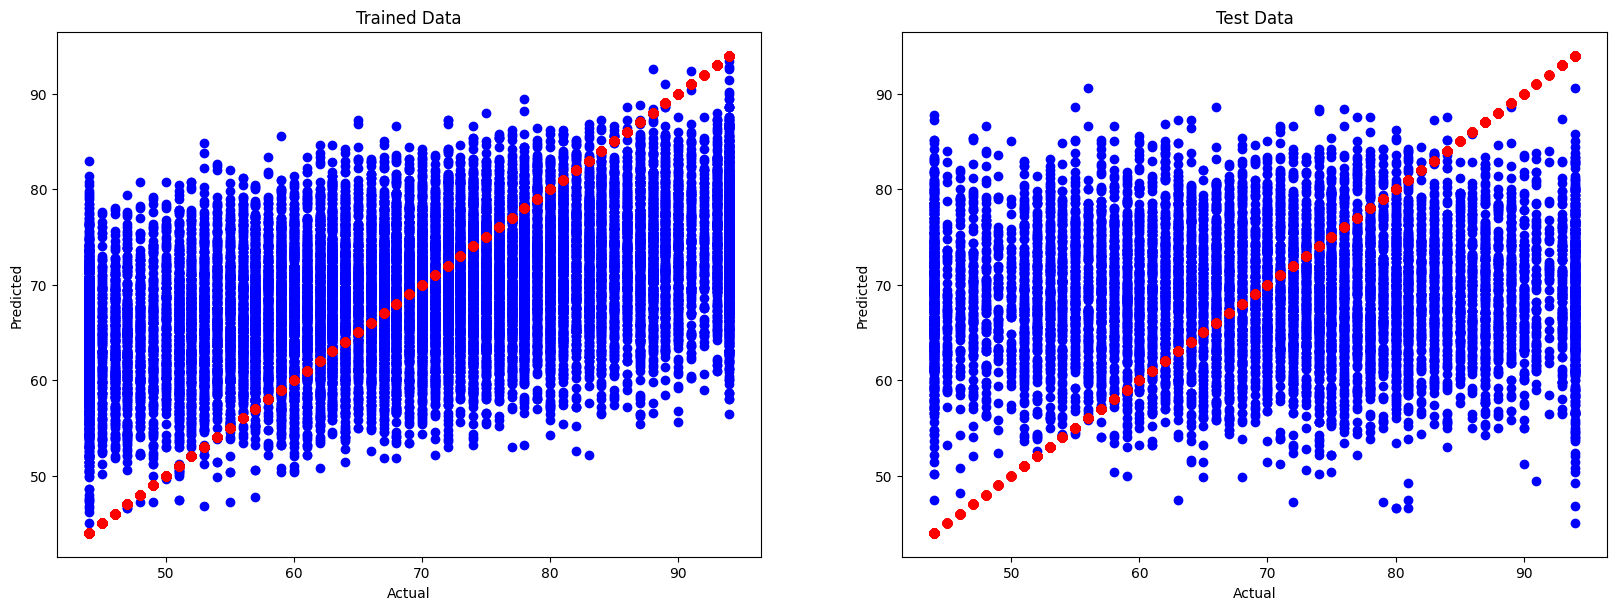

In [53]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_knr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_knr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [54]:
adr = AdaBoostRegressor()

In [55]:
adr.fit(X_train,y_train)
y_pred_adr_train = adr.predict(X_train)
y_pred_adr_test = adr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_adr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_adr_test))

--------------------------------


mean_absolute_error: 11.602798935823879 
mean_squared_error: 194.579772055771 
root_mean_squared_error: 13.949185354556409 
r2_square: 0.002814567287289793 
--------------------------------


mean_absolute_error: 11.59744111981422 
mean_squared_error: 193.64530723855032 
root_mean_squared_error: 13.915649723909779 
r2_square: 0.001490579079601262 


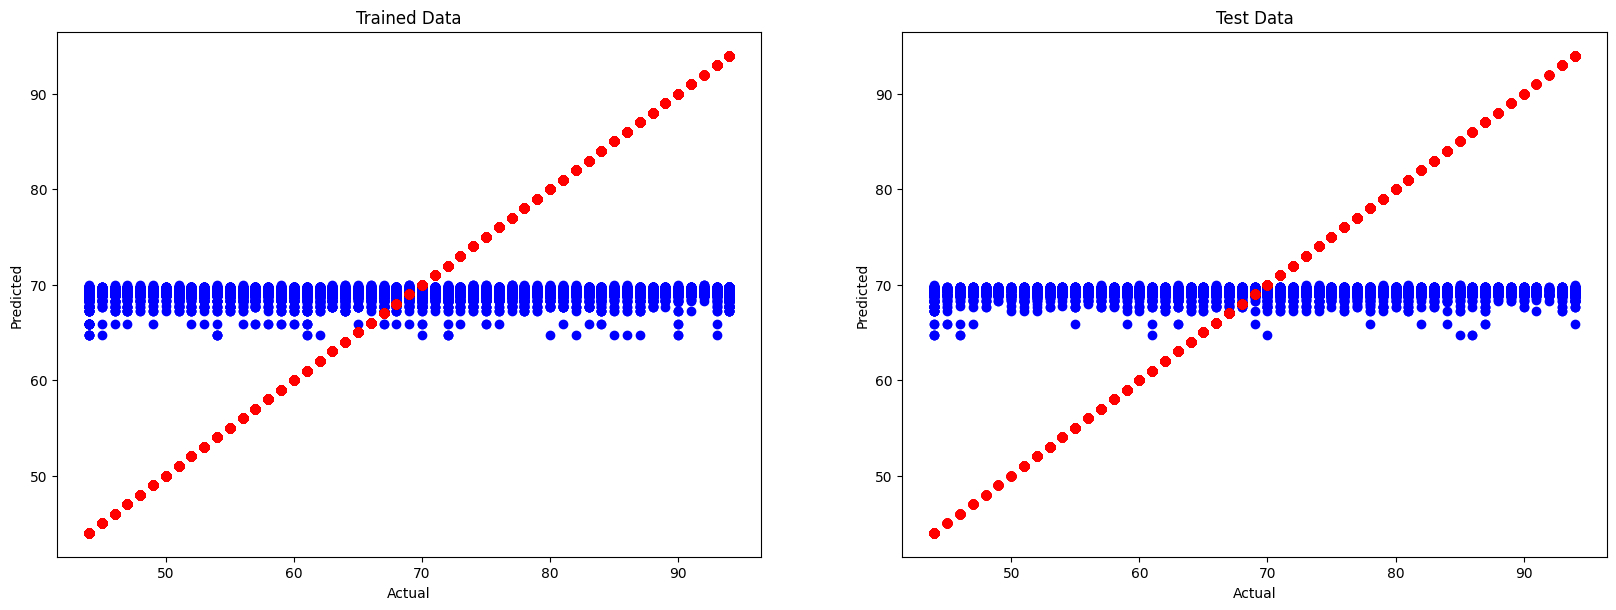

In [56]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_adr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_adr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [57]:
xgr = XGBRegressor()

In [58]:
xgr.fit(X_train,y_train)
y_pred_xgr_train = xgr.predict(X_train)
y_pred_xgr_test = xgr.predict(X_test)
print('--------------------------------')
print(evaluate_models(y_train, y_pred_xgr_train))
print('--------------------------------')
print(evaluate_models(y_test, y_pred_xgr_test))

--------------------------------


mean_absolute_error: 9.878345893128566 
mean_squared_error: 144.9182464177674 
root_mean_squared_error: 12.038199467435627 
r2_square: 0.2573207238589602 
--------------------------------


mean_absolute_error: 11.792058036724727 
mean_squared_error: 203.38338548266844 
root_mean_squared_error: 14.261254695245732 
r2_square: -0.0487226845779245 


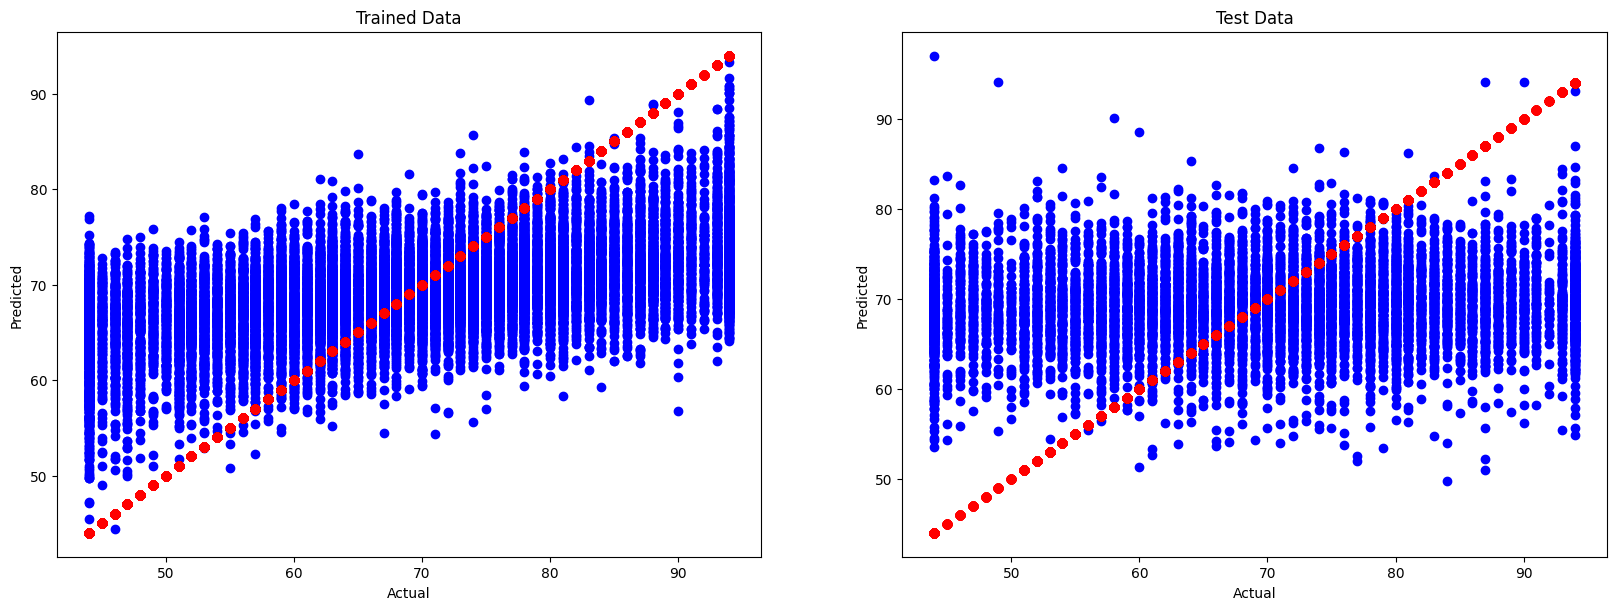

In [59]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_xgr_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_xgr_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.model_selection import KFold, cross_val_score

In [61]:
X_train.columns

Index(['test preparation ', 'gender', 'parental level of education', 'lunch',
       'Section', 'practical score', 'viva score'],
      dtype='object')

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_class(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='macro')
    recall = recall_score(true, predicted, average='macro')
    f1 = f1_score(true, predicted, average='macro')
    return  "\naccuracy: {} \nprecision: {} \nrecall: {} \nf1: {} " . format(
       accuracy, precision, recall, f1)

In [63]:
rfc = RandomForestClassifier()


In [65]:
rfc.fit(X_train,y_train)
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc_test = rfc.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_rfc_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_rfc_test))
print('--------------------------------')

--------------------------------

accuracy: 0.9510245993124693 
precision: 0.9511378473748482 
recall: 0.9498442549860778 
f1: 0.9504000187340449 
--------------------------------

accuracy: 0.08375 
precision: 0.07703519532869908 
recall: 0.07513165888360689 
f1: 0.0757300956883984 
--------------------------------


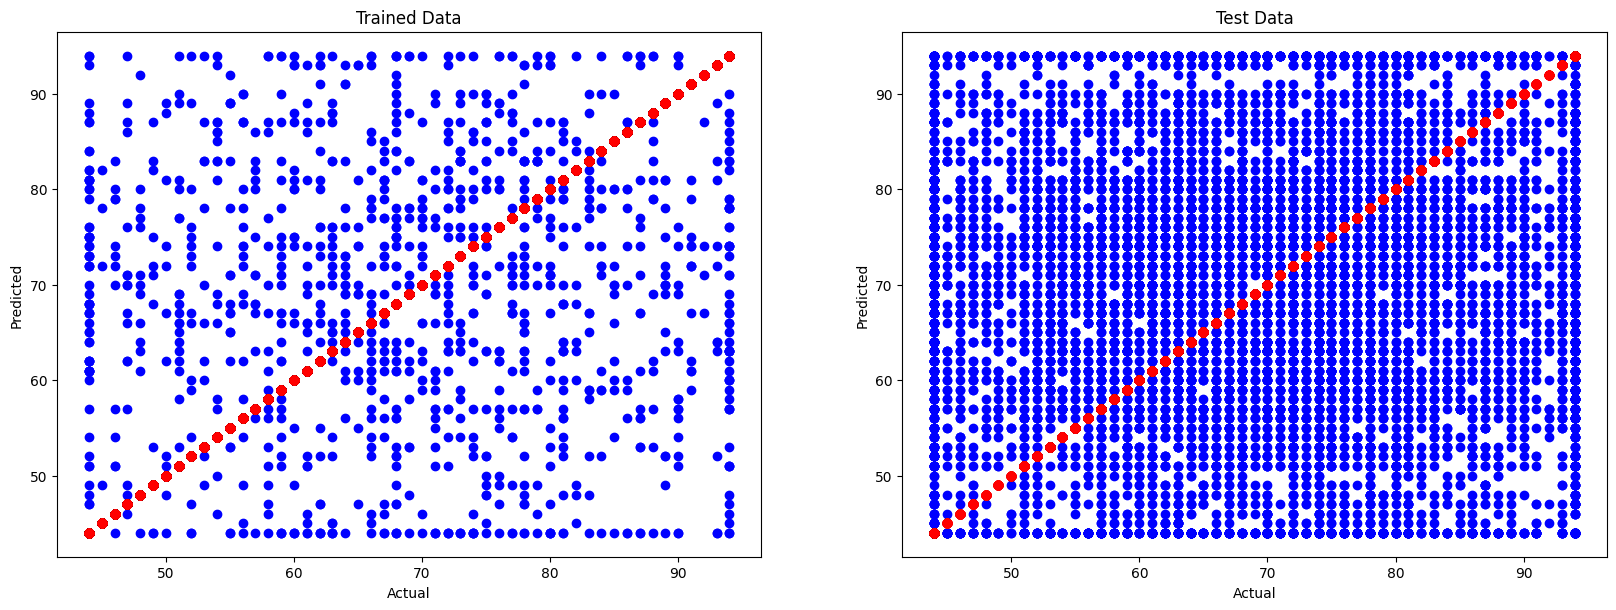

In [66]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_rfc_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_rfc_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(X_train,y_train)
y_pred_dtc_train = dtc.predict(X_train)
y_pred_dtc_test = dtc.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_dtc_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_dtc_test))
print('--------------------------------')

--------------------------------

accuracy: 0.9510245993124693 
precision: 0.9524666131386704 
recall: 0.9500805477982359 
f1: 0.9504202971211043 
--------------------------------

accuracy: 0.08875 
precision: 0.08078414334822305 
recall: 0.08071537319352211 
f1: 0.08048898805887525 
--------------------------------


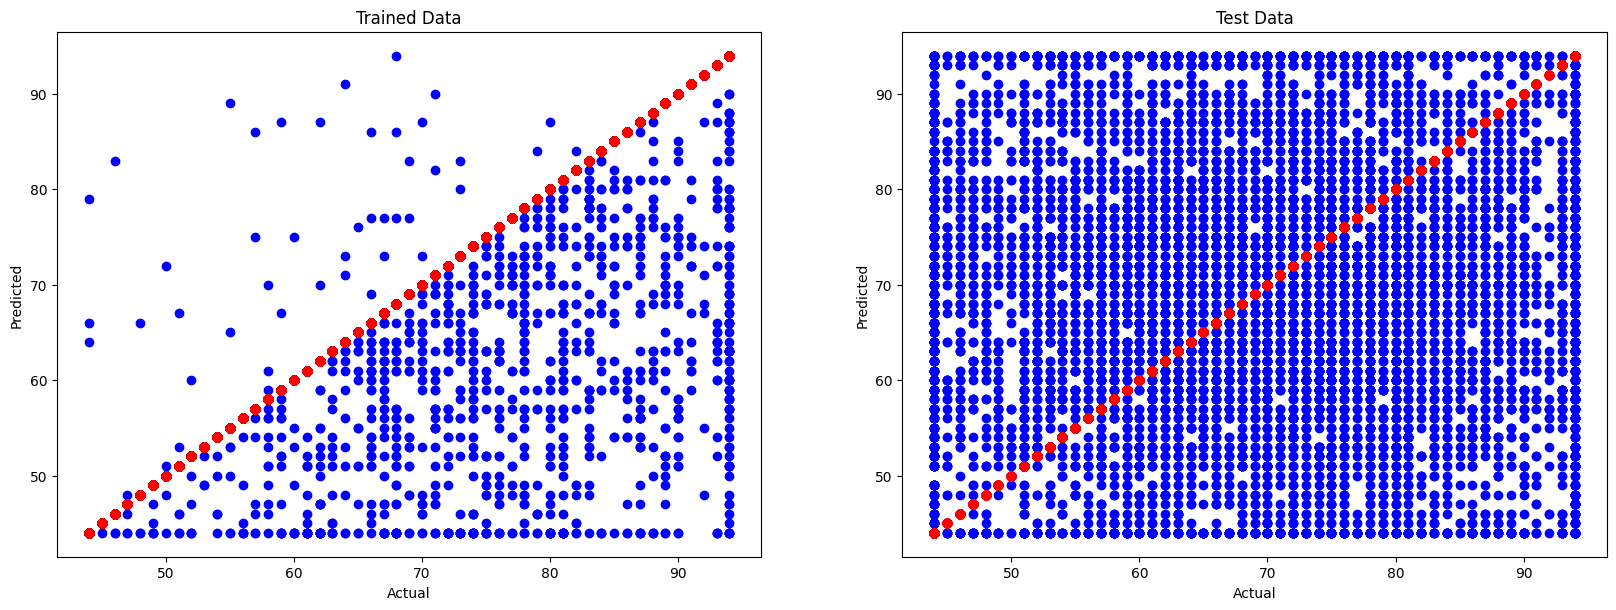

In [69]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_dtc_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_dtc_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [70]:
knc = KNeighborsClassifier()

In [71]:
knc.fit(X_train,y_train)
y_pred_knc_train = knc.predict(X_train)
y_pred_knc_test = knc.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_knc_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_knc_test))
print('--------------------------------')


--------------------------------

accuracy: 0.2781374168489665 
precision: 0.3257293109288897 
recall: 0.2747602272875363 
f1: 0.2501409886346803 
--------------------------------

accuracy: 0.04114583333333333 
precision: 0.032504537928944525 
recall: 0.034293063695056324 
f1: 0.02763591632413355 
--------------------------------


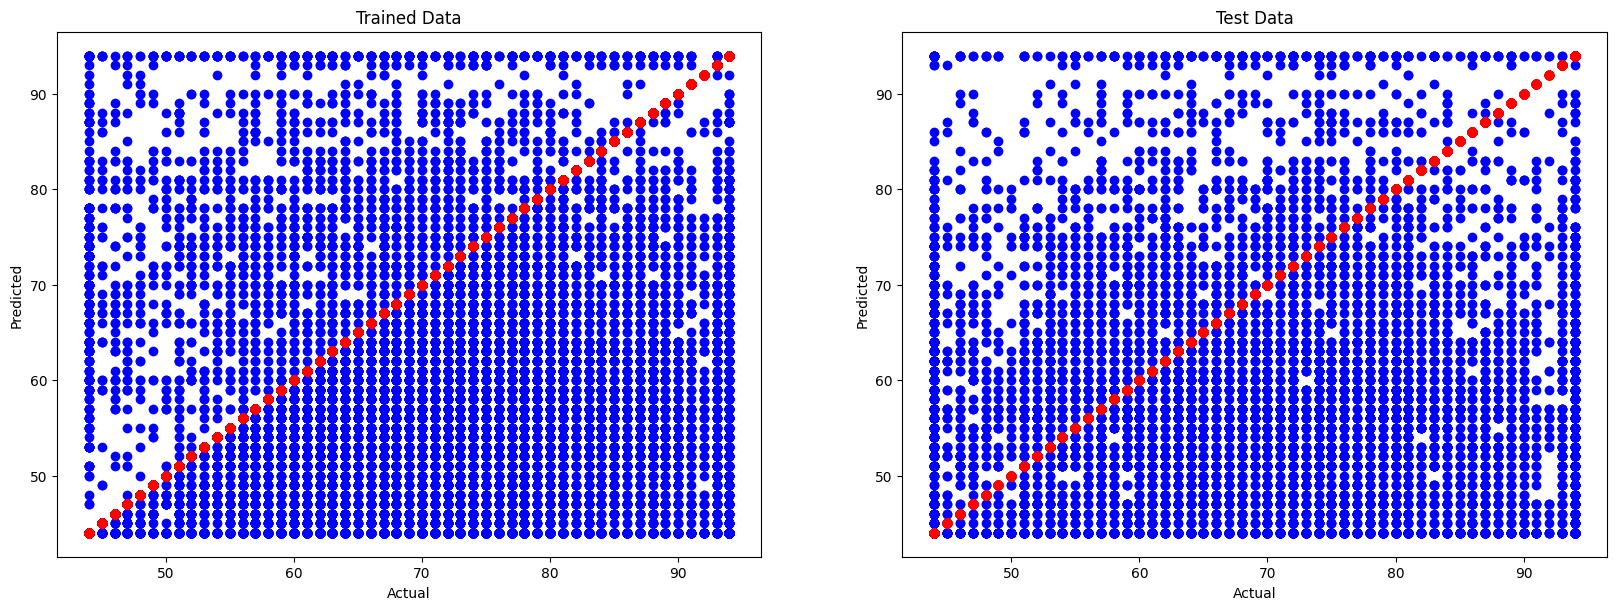

In [72]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_knc_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_knc_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [73]:
adc = AdaBoostClassifier()

In [74]:
adc.fit(X_train,y_train)
y_pred_adc_train = adc.predict(X_train)
y_pred_adc_test = adc.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_adc_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_adc_test))
print('--------------------------------')

--------------------------------

accuracy: 0.058707978034733696 
precision: 0.007444251256051826 
recall: 0.021162344895842986 
f1: 0.005319291677271405 
--------------------------------

accuracy: 0.05552083333333333 
precision: 0.007372925114056884 
recall: 0.020153518245384906 
f1: 0.004702454587845792 
--------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


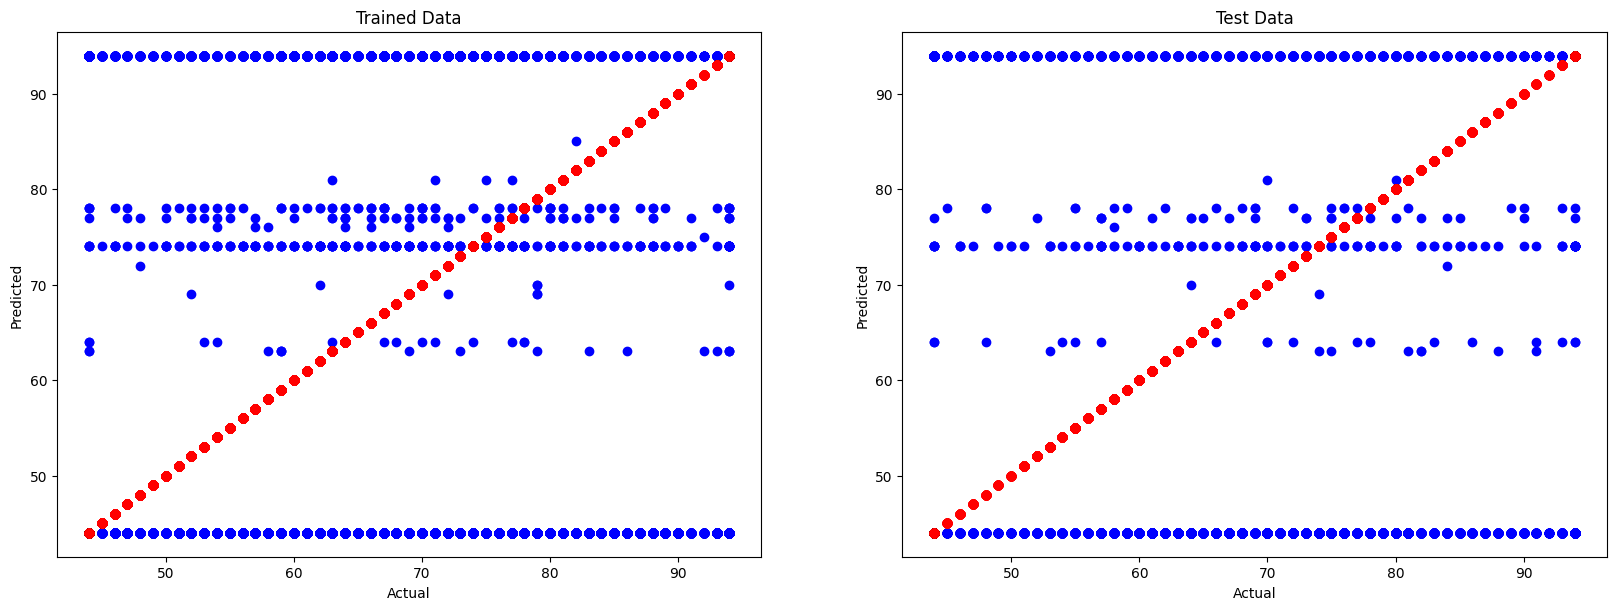

In [75]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_adc_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_adc_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [77]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "Ridge": {'alpha':[1, 10]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model,
        param_grid[model_name],
        scoring=scorer,
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train) # Make predictions

    y_train_pred = grid_search.predict(X_train)

    y_test_pred = grid_search.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)

    model_list.append(model_name)

    print('Best hyperparameters:', grid_search.best_params_)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 13.9617
- Mean Squared Error: 194.9288
- Mean Absolute Error: 11.6102
- R2 Score: 0.0010
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.9119
- Mean Squared Error: 13.9119
- Mean Absolute Error: 11.5861
- R2 Score: 0.0020


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 13.9689
- Mean Squared Error: 195.1290
- Mean Absolute Error: 11.6209
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.9269
- Mean Squared Error: 13.9269
- Mean Absolute Error: 11.6094
- R2 Score: -0.0001


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 12.7804
- Mean Squared Error: 163.3386
- Mean Absolute Error: 10.4936
- R2 Score: 0.1629
---------------------------------

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "depth", "iterations" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor
Best hyperparameters: {'depth': 6, 'iterations': 30, 'learning_rate': 0.01}
Model performance for Training set
- Root Mean Squared Error: 13.8297
- Mean Squared Error: 191.2600
- Mean Absolute Error: 11.5013
- R2 Score: 0.0198
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.9168
- Mean Squared Error: 13.9168
- Mean Absolute Error: 11.5943
- R2 Score: 0.0013


AdaBoost Regressor
Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 128}
Model performance for Training set
- Root Mean Squared Error: 13.9459
- Mean Squared Error: 194.4881
- Mean Absolute Error: 11.5985
- R2 Score: 0.0033
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.9151
- Mean Squared Error: 13.9151
- Mean Absolute Error: 11.5953
- R2 Score: 0.0016




In [79]:
 pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Random Forest Regressor,0.003050
0,Linear Regression,0.002025
5,Gradient Boosting,0.001908
7,AdaBoost Regressor,0.001575
6,XGBRegressor,0.001328
3,Decision Tree,0.001114
1,Lasso,-0.000131
2,K-Neighbors Regressor,-0.140833


In [80]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


In [81]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [86]:
rfc_grid = RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9, n_estimators=50)
rfc_grid.fit(X_train,y_train)
y_pred_rfc_grid_train = rfc_grid.predict(X_train)
y_pred_rfc_grid_test = rfc_grid.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_rfc_grid_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_rfc_grid_test))
print('--------------------------------')


--------------------------------

accuracy: 0.06129737934729229 
precision: 0.0024815844393358925 
recall: 0.021635013961080963 
f1: 0.0042862399702267755 
--------------------------------

accuracy: 0.0578125 
precision: 0.0023189367693858187 
recall: 0.02071257190514802 
f1: 0.004011236355172801 
--------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


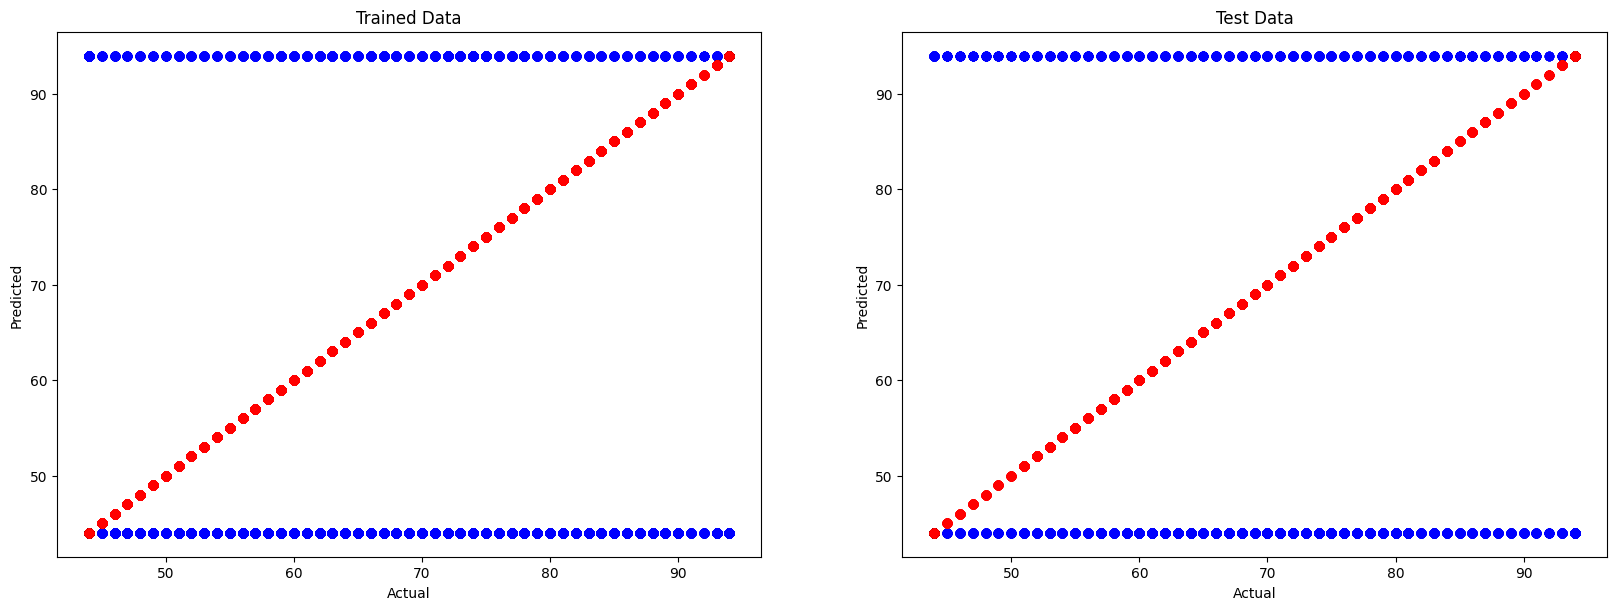

In [87]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_rfc_grid_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_rfc_grid_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [89]:
import time
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, poisson

In [90]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params = g1.best_params_
cls_params

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_split': 2}

In [91]:
dtc_grid = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=5, min_samples_split=2)

In [92]:
dtc_grid.fit(X_train,y_train)
y_pred_dtc_grid_train = dtc_grid.predict(X_train)
y_pred_dtc_grid_test = dtc_grid.predict(X_test)
print('--------------------------------')
print(evaluate_model_class(y_train, y_pred_dtc_grid_train))
print('--------------------------------')
print(evaluate_model_class(y_test, y_pred_dtc_grid_test))
print('--------------------------------')

--------------------------------

accuracy: 0.05835081923300147 
precision: 0.0022734530437197985 
recall: 0.020787342002562176 
f1: 0.004073847869111242 
--------------------------------

accuracy: 0.056875 
precision: 0.0022180265913422773 
recall: 0.020495602825536103 
f1: 0.003977489453008281 
--------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


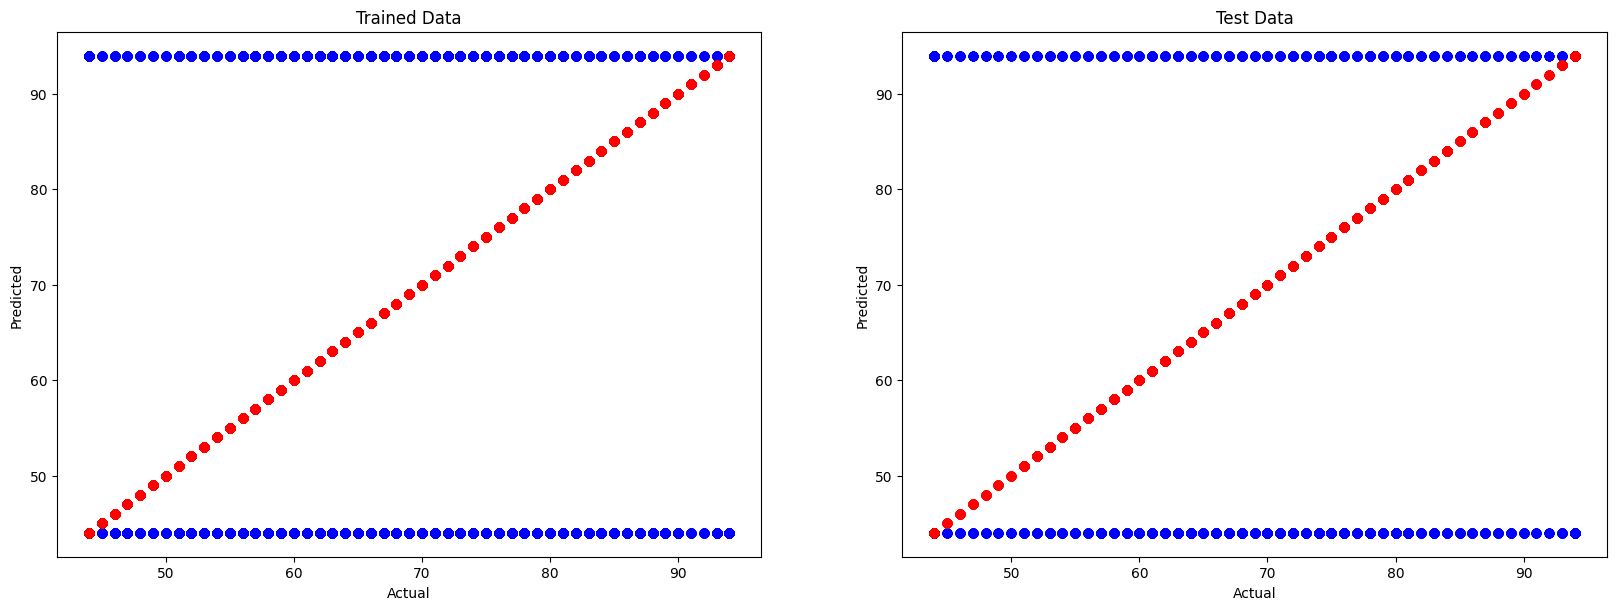

In [93]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.scatter(y_train, y_pred_dtc_grid_train, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')
plt.title('Trained Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_dtc_grid_test, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Among all the models trained the decision tree classifier shows the best results so it is used to predict the results

In [96]:
test = pd.read_csv('/content/test.csv')

In [94]:
def preprocess_inputs_test(df):
    df = df.copy()
    # Drop Roll no column
    df = df.drop('Roll no', axis=1)
 # One-hot encode categorical features
    for column in ['test preparation ', 'gender', 'parental level of education', 'lunch', 'Section']:
          df = label_encode(df, column)
    # Scale
    scaler = StandardScaler()
    scaler.fit(df)
    df = pd.DataFrame(scaler.transform(df), columns=df.columns)

    return df

In [97]:
Y = preprocess_inputs_test(test)

In [98]:
result_dtc = dtc.predict(Y)

In [101]:
result_dtc_submit = pd.DataFrame(result_dtc,  columns=['exam score'])

In [102]:
submit = pd.concat([test['Roll no'], result_dtc_submit], axis=1)

In [103]:
submit.head()

,Roll no,exam score
0,EXA32000,68
1,EXA32001,70
2,EXA32002,74
3,EXA32003,62
4,EXA32004,73


In [104]:
submit.to_csv('submit.csv', index=False)